In this homework, you need to solve two tasks. For problems with theoretical calculations, you need to show a sufficient number of intermediate steps to explain how you have obtained the result. 
* Formulas are expected in Latex style inside the notebook. The assignment should be uploaded in Jupyter Notebook format(`.ipynb`). 
* Overall, there are 45 points, however, you can get a maximum of 40 points for this assignment( `your_points = max(your_points, 40)`). 
* No bonus points will be transferred to the next assignment.

# Task 1. Moscow weather (20 points)

In this task you need to estimate parameters and their confidence intervals for a given sample. As data, you will explore Moscow weather. You can look at some visualizations of martian weather [here](https://pudding.cool/2018/01/mars-weather/) (completely unrelated to Moscow weather, though).

First of all, you will need some libraries. Also, fix random seed to get reproducable results.

In [1]:
import numpy as np
from numpy.random import choice, seed
import pandas as pd
from scipy.stats import sem, norm, skew, chi2
import matplotlib.pyplot as plt
from tqdm import tqdm


seed(366)

In [2]:
import matplotlib as mp
import matplotlib.font_manager

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

mp.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
mp.rcParams['legend.handletextpad'] = 0.5
mp.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
mp.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
mp.rcParams['font.size'] = 12
mp.rcParams['font.family'] = 'serif'
mp.rcParams['font.serif'] = 'Times New Roman'
mp.rcParams['axes.labelsize'] = labelsize
mp.rcParams['axes.titlesize'] = titlesize
mp.rcParams['axes.unicode_minus'] = False

mp.rc('xtick', labelsize=xticksize)
mp.rc('ytick', labelsize=yticksize)
mp.rc('legend', fontsize=legendsize)

mp.rc('font', **{'family':'serif'})

## Part 1. Load data (1 point)

You need to load data from `moscow-weather.csv`, take feature for your variant, remove absent values (`Nan`s) and convert sample to `int` type. 

### a) 

`feature_name = "TMIN"`

### b)

`feature_name = "TMAX"`

In [3]:
feature_name = 'TMIN'
df = pd.read_csv("moscow-weather.csv")[feature_name]
sample_full = df.dropna().values.astype('int')

Let's take a four month period or ~ 121 days. Sample them randomly from full sample using function `choice`(from `numpy.random`) with parameter `replace=False`.

In [4]:
N = 121

# start = np.random.randint(0, len(sample_full) - N)
# sample_part = sample_full[start:start + N]
sample_part = np.random.choice(sample_full, size=N, replace=False)

Plot values frequences for full and partial sample using bar plot.

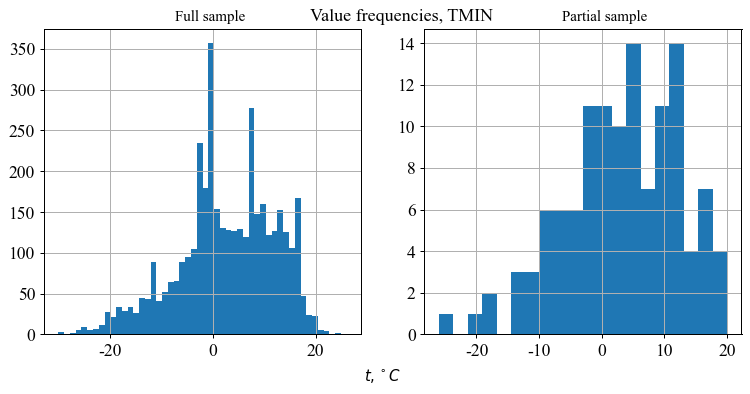

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4.5), dpi=90)

ax[0].hist(sample_full, bins=50)
ax[0].grid()
ax[1].hist(sample_part, bins=20)
ax[1].grid()
fig.text(0.27, 0.9, 'Full sample')
fig.text(0.7, 0.9, 'Partial sample')
fig.text(0.42, 0.9, 'Value frequencies, TMIN', fontsize='large')
fig.text(0.48, 0.01, '$t, ^\circ C$')
plt.show()

## Part 2. Parameter estimation (6 points)
Find the following parameters' estimates and their 95% confidence intervals (except for `mode` and `skewness`). You need to show theoretical calculations (with intermediate steps) for estimates and intervals (with intermediate steps) and then make simulation.

### a) Mean and CI

$$ \hat{mean} = ...$$

$$ CI(\hat{mean}) = ...$$

Maximum likelihood estimate for normal distribution mean is sample mean: $\mu_n = \frac{1}{n} \sum_i X_i$

As proven in lecture 4, if $\hat{\mu} \leadsto \mathcal{N}(\mu_n, \sigma_n^2)$, than confidence interval of $\hat{\mu}$ is given by $C_n = (\mu_n - z_{\alpha / 2}\sigma_n, \mu_n + z_{\alpha / 2}\sigma_n)$. CLT states that for i.i.d. samples from normal distribution from $\sigma_n = \frac{1}{\sqrt{n}} \hat{\sigma}$, where $\hat{\sigma}$ is sample variance

In [6]:
import scipy.stats as sst
alpha = 0.05
z = sst.norm.ppf(1 - alpha/2)


# mean, (lower, upper) = sample_part.mean(),
n = sample_part.size
mean = sample_part.mean()
lower = mean - z * sample_part.std() / np.sqrt(n)
upper = mean + z * sample_part.std() / np.sqrt(n)
print(f"Mean {mean:.3f} with confidence interval ({lower:.3f}, {upper:.3f})")

Mean 3.174 with confidence interval (1.534, 4.814)


### b) Median and CI

Here you can assume that PDF is continuous at the median point and provide a normal-based interval.

$$ \hat{median} = ...$$

$$ CI(\hat{median}) = ...$$

Sample median is given by 
$$
\hat{m} = \begin{cases}
X_{(\frac{n+1}{2})} & \text{if $n=2k + 1$}\\
\left(X_{(\frac{n}{2})} + X_{(\frac{n+1}{2})}\right) / 2 & \text{if $n=2k$,}
\end{cases}
$$
where $X_{(i)}$ denote sample elements sorted ascending.

As proven in lecture 3, page 40, $\sqrt{n}(m - m_\ast) \leadsto \mathcal{N}(0, \sigma^2 \frac{\pi}{2})$. So,
$$
-z_{\alpha/2}\sigma_n \sqrt{\frac{\pi}{2}} < \sqrt{n}(m - m_\ast) < z_{\alpha/2}\sigma_n \sqrt{\frac{\pi}{2}} \Rightarrow \\
m_\ast - z_{\alpha/2}\sigma_n \sqrt{\frac{\pi}{2n}} < m < m_\ast + z_{\alpha/2}\sigma_n \sqrt{\frac{\pi}{2n}}
$$
gives alpha-CI for median

In [7]:
# Your code here

# median, (lower, upper) = ...
median = np.median(sample_part)
lower = median - z * sample_part.std() * (np.pi / (2 * n))**0.5
upper = median + z * sample_part.std() * (np.pi / (2 * n))**0.5
print(f"Median {median:.3f} with normal-based confidence interval ({lower:.3f}, {upper:.3f})")

Median 4.000 with normal-based confidence interval (1.945, 6.055)


### c) Variance and CI

Here you can assume that the sample comes from a normal distribution, but the mean and variance are not known.


$$ \hat{Variance} = ...$$

$$ CI(\hat{Variance}) = ...$$

By definition of chi-squared distribution we obtain that:
$$
    \sum_{i=1}^n \tilde{X_i} = \sum_{i=1}^n \left( \frac{X_i - \mu}{\sigma} \right)^2 = \frac{n\sigma_n^2}{\sigma^2} \sim \chi_n^2.
$$    
If we denote $\chi_n^2$ distribution function as $F(x)$ and $b = F^{-1}(1 - \alpha / 2)$, $a = F^{-1}(\alpha / 2)$, than 
$$
    a < \frac{n\sigma_n^2}{\sigma^2} < b \Rightarrow \frac{b}{n\sigma_n^2} < \sigma^2 < \frac{a}{n\sigma_n^2}
$$

In [8]:
# Your code here

# var, (lower, upper) = ...
var = sample_part.var()
b = sst.chi2(df=n).ppf(1 - alpha / 2)
a = sst.chi2(df=n).ppf(alpha / 2)
lower = n * var / b
upper = n * var / a
print(f"Variance {var:.3f} with confidence interval ({lower:.3f}, {upper:.3f})")

Variance 84.722 with confidence interval (66.855, 110.890)


### d) Mode (most frequent value in a sample)

In [9]:
values_and_counts = np.stack(np.unique(sample_part, return_counts=True))
mode = values_and_counts[:,values_and_counts[1].argsort()][0, -1]
# can also be done by sst.mode(sample_part).mode[0]
print(f"Mode: {mode}")

Mode: 10


### e) Skewness

In [10]:
# Your code here

skewness = np.mean((sample_part - mean)**3) / var**1.5
# Can also be done by sst.skew(sample_part)
print(f"Skewness: {skewness:e}")

Skewness: -4.987925e-01


## Part 3. Bootstrap (4 points)

Find confidence intervals for following estimates using bootsrap. Use function `choice` with parameter `replace=True` for bootstrap sampling. Try different numbers of generated samples.

### a) Mean and CI

In [11]:
# Your code here

def bootstrap_interval(estimator, X, num_resamples=1000, level=0.95):
    estimates = np.empty(num_resamples)
    for i in range(num_resamples):
        estimates[i] = estimator(np.random.choice(X, size=len(X), replace=True))
    alpha = 1 - level
    m = estimates.mean()
    return 2 * m - np.quantile(estimates, 1 - alpha), 2 * m - np.quantile(estimates, alpha)
    
mean, (lower, upper) = np.mean(sample_part), bootstrap_interval(np.mean, sample_part)
# print(mean, (upper + lower) / 2)
print(f"Mean {mean:.3f} with confident interval ({lower:.3f}, {upper:.3f})")

Mean 3.174 with confident interval (1.744, 4.564)


### b) Median and CI

In [12]:
# Your code here

median, (lower, upper) = np.median(sample_part), bootstrap_interval(np.median, sample_part)
# print(median, (upper + lower) / 2)
print(f"Median {median:.3f} with normal-based confident interval ({lower:.3f}, {upper:.3f})")

Median 4.000 with normal-based confident interval (1.310, 5.310)


### c) Variance and CI

In [13]:
# Your code here

var, (lower, upper) = np.var(sample_part), bootstrap_interval(np.var, sample_part)
# print(var, (upper + lower) / 2)
print(f"Variance {var:.3f} with confident interval ({lower:.3f}, {upper:.3f})")

Variance 84.722 with confident interval (65.676, 100.782)


## Part 4. Comparison with true values (1 point)

Compare with estimates calculated over full sample. Write conclusion about estimates and their confidence intervals obtained without and with bootstrap. Also, you can share some conclusions about moscow weather :)

In [14]:
print('\tFull\tPart')
print(f'mean\t{sample_full.mean():.2f}\t{mean:.2f}')
print(f'median\t{np.median(sample_full):.2f}\t{median:.2f}')
print(f'var\t{sample_full.var():.2f}\t{var:.2f}')
print(f'mode\t{sst.mode(sample_full).mode[0]:.2f}\t{mode:.2f}')
print(f'skew\t{sst.skew(sample_full):.2f}\t{skewness:.2f}')

# mean = ...
# median = ...
# var = ...
# moda = ...
# skewness = ...

	Full	Part
mean	2.62	3.17
median	3.00	4.00
var	89.01	84.72
mode	0.00	10.00
skew	-0.47	-0.50


Bootstrap confidence intervals can be calculated more easily as they do not assumptions about data distribution. Statistics of full sample fall into confidence intervals calculated on partial sample.
Balance between relative value frequencies can be upset while constructing partial sample, that is the reason for difference between sample mode from full and partial sample. Both samples have slight negative skew, that can be seen from histograms. Statistics comply with feelings about average temperature in Moscow.

## Part 5. Confidence intervals and sample size (8 points)

Compare the size of confidence intervals **for the mean** obtained without and with bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the mean of the full sample). Consider sizes `[42, 84, 168, 335, 670, 1340]`. Plot results and make conclusion about their accuracy.

In [15]:
seed(476)
sizes = np.r_[42, 84, 168, 335, 670, 1340]

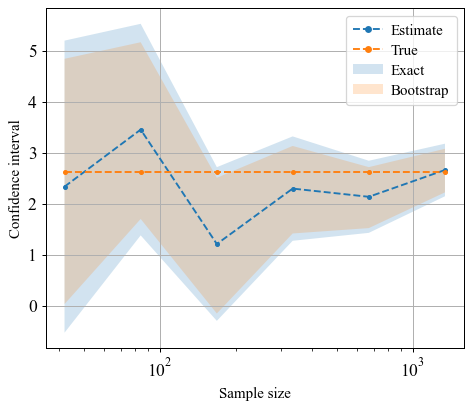

In [16]:
def exact_interval_mean(sample_, size_, level=0.05):
    z_ = sst.norm.ppf(1 - level/2)
    l = np.mean(sample_) - z_ * np.std(sample_) / size_**0.5
    r = np.mean(sample_) + z_ * np.std(sample_) / size_**0.5
    return l, r

boot_ints = np.empty((sizes.size, 2))
exact_ints = np.empty((sizes.size, 2))
means = np.empty(sizes.size)

for i, size in enumerate(sizes):
    sample_part = np.random.choice(sample_full, size=size, replace=False)
    means[i] = sample_part.mean()
    exact_ints[i] = exact_interval_mean(sample_part, size)
    boot_ints[i] = bootstrap_interval(np.mean, sample_part)

    
fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=90)
ax.fill_between(sizes, exact_ints[:, 0], exact_ints[:, 1], alpha=0.2, label='Exact')
ax.fill_between(sizes, boot_ints[:, 0], boot_ints[:, 1], alpha=0.2, label='Bootstrap')
ax.plot(sizes, means, '.--', label='Estimate')
ax.plot(sizes, sizes.size * [sample_full.mean()], '.--', label='True')
ax.set_xscale('log')
ax.set_xlabel('Sample size', fontsize=12)
ax.set_ylabel('Confidence interval', fontsize=12, rotation=90)
ax.legend(fontsize=12)
ax.grid()
plt.show()

As shown theoretically, size of confidence interval decreases while the size of sample increases.

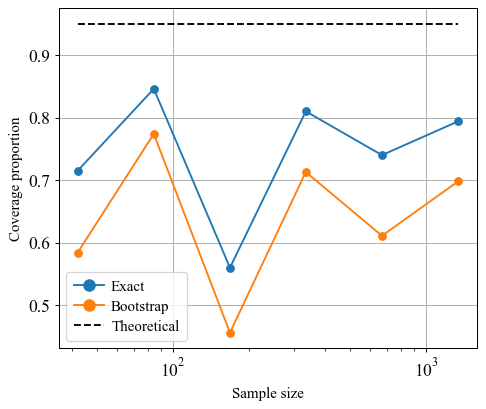

In [17]:
n_gener = 1000
inside_boot = np.empty(sizes.size)
inside_exact = np.empty(sizes.size)
for i, size in enumerate(sizes):
    l_boot, r_boot = boot_ints[i]
    l_exact, r_exact = exact_ints[i]
    # Draw partial sample of size `size` from overall weather data
    sample_part = np.random.choice(sample_full, size=size, replace=False)
    # Generate n_gener samples of true normal distribution with parameters estimated by partial sample
    sample_true = sst.norm(loc=sample_part.mean(), scale=sample_part.std()).rvs(size=(n_gener, size))
    means_true = sample_true.mean(axis=1)
    inside_boot[i] = np.mean((l_boot < means_true) & (means_true < r_boot))
    inside_exact[i] = np.mean((l_exact < means_true) & (means_true < r_exact))
    

fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=90)
ax.plot(sizes, inside_exact, '-o', label='Exact')
ax.plot(sizes, inside_boot, '-o', label='Bootstrap')
ax.plot(sizes, [0.95] * len(sizes), 'k--', label='Theoretical')
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.set_xlabel('Sample size', fontsize=12)
ax.set_ylabel('Coverage proportion', fontsize=12)
ax.grid()
plt.show()

Your conclusion:

Exact confidence intervals are more accurate than bootstrap ones, their coverage is closer to 95\%.

# Task 2. Currency in RC-circuit (25 points)

In this part you need to estimate parameters and apply delta method. 

First of all, you will need some libraries. Also, fix random seed to get reproducible results.

In [18]:
import numpy as np
from scipy.stats import norm, uniform
from numpy.random import choice, seed

seed(100)

## Part 1. Estimate parameters (4 points)

Assume that there is an RC-circuit with a capacitor and a resistor. 
<img src="circuit.png" width="200"  class="center">

We charge the capacitor until it reaches voltage $V$ and measure current intensity. In this case voltage on the capacitor yields the formula for exponential decay:

$$ V_C(t) = V e^{-\frac{t}{RC}} $$

Let's assume that voltage $V$ and resistence $R$ are independent and belong to the following distributions:

### a) 
$V \sim \mathcal{N}(4, 1)$, 

$R \sim \mathcal{U}(6, 11)$

### b) 
$V \sim \mathcal{N}(17, 3)$, 

$R \sim \text{Exp}(22)$

Consider **true values** for $V$ and $R$ to be the means of the corresponding distributions.

Generate sample for $V$ of size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for the estimates (with intermediate steps) and make simulation.

$$\hat{V}_{n} = ...$$

$$
% \mathcal{L} = 
\mathcal{L}_V = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{\left(V_i - \mu\right)^2}{2\sigma^2}\right)} = (2\pi\sigma^2)^{-n/2} \exp{\left( -\frac{1}{2\sigma^2} \sum_{i=1}^n \left( V_i - \mu \right)^2 \right)} \\
\ell_V = \ln\mathcal{L}_V = -\frac{n}{2} \ln 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left( V_i - \mu \right)^2 \\
\frac{\partial \ell_V}{ \partial \mu} = 0 \Rightarrow \sum_{i=1}^n(\hat{\mu} - V_i) = 0 \Rightarrow \hat{\mu} = \frac{1}{n}\sum_{i=1}^n V_i
$$

In [19]:
# Your code here
V_distr = sst.norm(loc=4, scale=1)
sample_v = V_distr.rvs(size=100)
v_mle = sample_v.mean()
print(f'ML estimate:\t{v_mle:.2f}')
print(f'Theoretical mean:\t4')

ML estimate:	3.90
Theoretical mean:	4


Generate sample for $R$ on size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for estimates (with intermediate steps) and make simulation.

$$\hat{R}_{n} = ...$$


$$
\ell_R = \ln \prod_{i=1}^n \frac{1}{b - a} = -n\ln(b - a) \\
\frac{\partial \ell_R}{ \partial a} = \frac{n}{b - a}
$$
The derivative with respect to $a$ is monotonically increasing. Thus, the MLE for $a$ would be the largest $a$ possible: $\hat{a} = \min_i X_i$.

Simlilarly for $b$: $\hat{b} = \max_i X_i$

$$
\hat\mu = \frac{\hat a + \hat b}{2},
$$
as if $X \sim \mathcal{U}_{[\alpha, \beta]}$, then $\mathbb{E}X = \frac{\alpha + \beta}{2}$

In [20]:
# Your code here
R_distr = sst.uniform(loc=6, scale=5)
sample_r = R_distr.rvs(size=100)
r_mle = (sample_r.min() + sample_r.max()) / 2
print(f'ML estimate:\t{r_mle:.2f}')
print(f'Theoretical mean:\t{(6 + 11) / 2}')

ML estimate:	8.56
Theoretical mean:	8.5


## Part 2. Apply delta method (8 points)

Assume, that we measure current intensity after 1 second. Let's take $C = 1$. In this case we get the following simplified formula:

$$I = \frac{V}{R} e^{-\frac{1}{R}} = g(V, R).$$

Find estimate for current and it's confidence interval. Show theoretical calculations for estimates (with intermediate steps) and make simulation.

$$\hat{I}_n = \frac{\hat{V}_n}{\hat{R}_n} e^{-\frac{1}{\hat{R}_n}}$$

$$ CI(\hat{I}_n) = \left(\hat{I}_n - z_{\alpha / 2}\hat{se}(\hat{I}_n), \; \hat{I}_n + z_{\alpha / 2}\hat{se}(\hat{I}_n)\right)$$

$\hat{se}(\hat{I}_n)$ needs to be estimated using delta method:
$$
\hat{se}(\hat{I}) = \sqrt{\left( \hat{\nabla} g \right)^T \hat{J} \left(\hat{\nabla} g\right)} \\
\hat{\nabla} g = \begin{bmatrix}
\left. \frac{\partial g}{\partial V} \right|_{\hat{V}}\\
\left. \frac{\partial g}{\partial R} \right|_{\hat{R}}
\end{bmatrix} =
\begin{bmatrix}
\frac{1}{\hat{R}}\exp\left({-\frac{1}{\hat{R}}}\right) \\
\hat{V} \exp\left({-\frac{1}{\hat{R}}}\right) \frac{ 1 - \hat{R}}{\hat{R}^3} 
\end{bmatrix}
$$

Derivatives of log-likelihood:
$$
\frac{\partial \ell}{\partial \hat{V}} = \frac{\partial \ell_V}{\partial \hat{V}} = \frac{1}{\sigma^2}\sum_{i=1}^n\left( V_i - \hat{V} \right) \\
\frac{\partial^2 \ell_V}{\partial \hat{V}^2} = -\frac{n}{\sigma^2}.
$$
As $\sigma^2$ MLE should be taken as well: $\hat{\sigma}^2 = \frac{1}{n}\sum\limits_{i=1}^n\left( V_i - \hat{V} \right)^2$.

In uniform distribution of $R$ we need to change from parameters $(a, b)$ (ends of interval) to $(m, b)$, $m \equiv \hat{R}$:
$$
m = \frac{a + b}{2} \Rightarrow a = 2m - b \\
p_{R}(x, a, b) = \frac{\mathbb{I}_{x \in [a, b]}}{b - a} = p_{R}(x, a, m) = \frac{\mathbb{I}_{x \in [2m - b, b]}}{2(b - m)} \\
\ell_R = -n\ln\left[2\left( b - \hat{R} \right)\right] \\
\frac{\partial \ell_R}{\partial \hat{R}} = \frac{n}{ b - \hat{R} }; \; \frac{\partial^2 \ell_R}{\partial \hat{R}^2} = -\frac{n}{\left( b - \hat{R} \right)^2} = -\frac{4n}{\left( \max R_i - \min R_i \right)^2}.
$$
Mixed derivatives of log-liklihood equal to $0$.

$$
H = \begin{bmatrix}
-\frac{n}{\hat{\sigma}^2_V} & 0 \\
0 & -\frac{4n}{\left( \max R_i - \min R_i \right)^2}
\end{bmatrix} \\
\hat{J} = -H^{-1}.
$$

I understand general setting as follows: $V$ and $R$ belong to aforementioned distributions $p_V$, $p_R$. Their true values equal to expectations of $p_V$, $p_R$ ($X \sim \mathcal{N}(\mu, \sigma^2),\;  \mathbb{E}X = \mu = V_{true}$, $X \sim \mathcal{U}_{[a, b]}, \; \mathbb{E}X = \frac{a + b}{2} = R_{true}$) and can be used to compare with observed values, but observed values are random and need to be generated using `scipy.stats`.

Given dependency $g(\cdot, \cdot, t)$ between $V$, $R$ and $I$, theoretical law of distribution of $I$ can hypothectically be calculated and used to obtain samples of $I$, but it requires very complex actions with density functions. Instead, I'll generate $V$ and $R$ samples from aforementioned distributions and obtain $I$ samples using physical law: $I = \frac{V}{R} e^{-\frac{t}{R}}$.

Here we can assume that we have multiple observation at time step $t=1$ to calculate ML estimates for $V$ and $R$ and to estimate $\hat{se}$ with delta method and then use it to calculate confidence intervals for future points.

In [21]:
num_ts = 20
def g(V, R, t):
    return V / R * np.exp(-t/R)
# Let's use samples of size 100 generated above
sample_i = g(sample_v, sample_r, t=1)
i_mle = g(v_mle, r_mle, t=1)
num_ts = 20
t = np.linspace(1, 20, num_ts)
v_true = 4
r_true = (6 + 11) / 2
i_true = g(v_true, r_true, t)

In [22]:
def grad_g(V, R, t):
    dg = np.array([
        1 / R * np.exp(-t/R),
        V / R**2 * np.exp(-t/R) * (t - R)
    ])
    if dg.ndim == 1:
        return dg.reshape(-1, 1)
    return dg

def hessian_ll(n, Vs, Rs):
    H = np.empty((2, 2))
    H[0, 1] = 0
    H[1, 0] = 0
    H[0, 0] = -n / np.var(Vs)
    H[1, 1] = -4 * n / (np.max(Rs) - np.min(Rs))**2
    return H

print('Delta method:')
H = hessian_ll(100, sample_v, sample_r)
J = np.linalg.inv(-H)
dg = grad_g(v_mle, r_mle, t=1)

se = np.diag(dg.T @ J @ dg) ** 0.5
print(f"SE: {se[0]:e}")

# i_hat = g(v_real, r_real, t)
lower_delta = i_mle - z*se
upper_delta = i_mle + z*se
print(
    f'estimate for current at t=1 {i_mle:.3f}'
)
print(f'confidence interval ({lower_delta[0]:.3f}, {upper_delta[0]:.3f})')

Delta method:
SE: 8.749381e-02
estimate for current at t=1 0.405
confidence interval (0.233, 0.576)


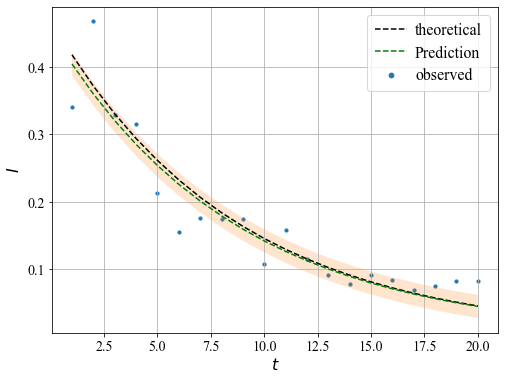

In [23]:
v_observed = V_distr.rvs(size=num_ts)
r_observed = R_distr.rvs(size=num_ts)
i_observed = g(v_observed, r_observed, t)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(t, i_true, 'k--', label='theoretical')
ax.scatter(t, i_observed, label='observed', s=10)
ax.plot(t, g(v_mle, r_mle, t), 'g--', label='Prediction')
ax.fill_between(t, g(v_mle, r_mle, t) - z*se / 10, g(v_mle, r_mle, t) + z*se / 10, alpha=0.2)
ax.set_xlabel('$t$')
ax.set_ylabel('$I$')
ax.grid()
ax.legend()
plt.show()

## Part 3. Non-parametric bootstrap estimation (2 points)

Estimate confidence interval for $I$ using non-parametric bootstrap.

In non-parametric bootstrap samples of $V$ and $R$ are taken from 'natural' distributions given above and used to get samples of $I$ at $t=1$. Then standard bootstrap procedure is applied.

In [24]:
# Your code here
n_trials = 100
lower_boot = np.empty(num_ts)
upper_boot = np.empty(num_ts)
i_means = np.empty(num_ts)
for j, ts in enumerate(t):
    v_sample = V_distr.rvs(size=n_trials)
    r_sample = R_distr.rvs(size=n_trials)
    i_sample = g(v_sample, r_sample, ts)
    i_means[j] = i_sample.mean()
    lower_boot[j], upper_boot[j] = bootstrap_interval(np.mean, i_sample)

# se = ...
# print(f"SE for non-parametric bootstrap: {se:e}")

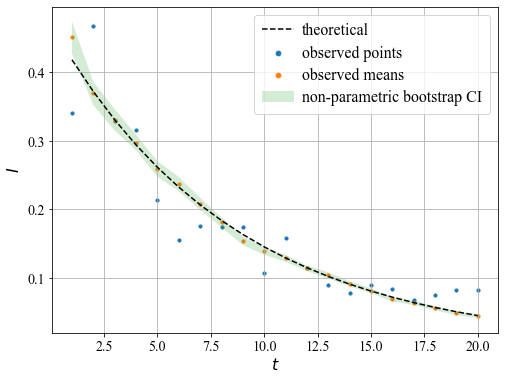

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(t, i_true, 'k--', label='theoretical')
ax.scatter(t, i_observed, label='observed points', s=10)
ax.scatter(t, i_means, label='observed means', s=10)
ax.fill_between(t, lower_boot, upper_boot, alpha=0.2, label='non-parametric bootstrap CI')
ax.set_xlabel('$t$')
ax.set_ylabel('$I$')
ax.grid()
ax.legend()
plt.show()

## Part 4. Parametric bootstrap estimation (3 points)

Estimate confidence interval for $I$ using parametric bootstrap.

In parametric bootstrap samples of $V$ and $R$ are taken from 'synthetic' distributions with ML estimates as parameters.

In [26]:
lower_pboot = np.empty(num_ts)
upper_pboot = np.empty(num_ts)
for j, ts in enumerate(t):
    # generate sample for V and R from distributions with estimated parameters
    v_generated = sst.norm(loc=sample_v.mean(), scale=sample_v.std()).rvs(size=n_trials)
    r_generated = sst.uniform(sample_r.min(), sample_r.max() - sample_r.min()).rvs(size=n_trials)
    i_generated = g(v_generated, r_generated, ts)
    lower_pboot[j], upper_pboot[j] = bootstrap_interval(np.mean, i_generated)
    

# se = ...
# print(f"SE for parametric bootstrap: {se:e}")

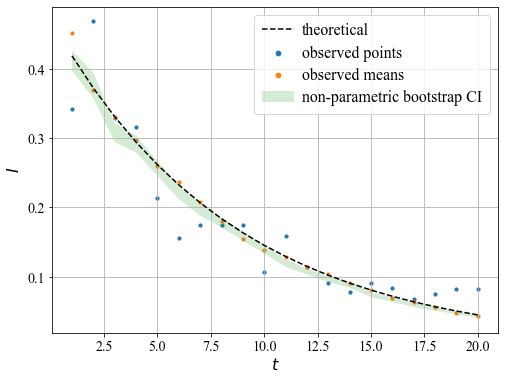

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(t, i_true, 'k--', label='theoretical')
ax.scatter(t, i_observed, label='observed points', s=10)
ax.scatter(t, i_means, label='observed means', s=10)
ax.fill_between(t, lower_pboot, upper_pboot, alpha=0.2, label='non-parametric bootstrap CI')
ax.set_xlabel('$t$')
ax.set_ylabel('$I$')
ax.grid()
ax.legend()
plt.show()

## Part 5. Compare results (8 points)

Compare the size of confidence intervals obtained using delta method, parametric and non-parametric bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the true value for the current $I$). Consider sizes `[1e1, ..., 1e4]`. Plot results and make conclusion about their accuracy.

In [28]:
sizes = np.logspace(1, 4, 4).astype('int')

/Users/evgeny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


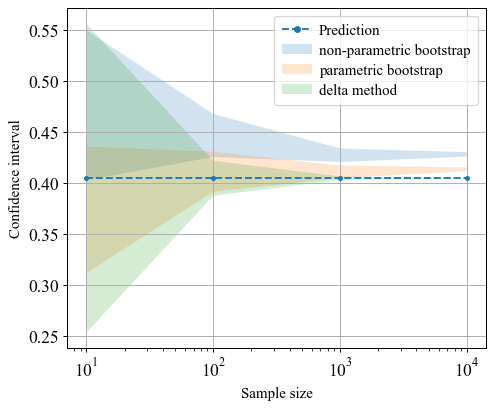

In [29]:
# Compare size of confidence intervals obtained using delta method, parametric and non-parametric bootstrap

boot_ints = np.empty((sizes.size, 2))
pboot_ints = np.empty((sizes.size, 2))
delta_ints = np.empty((sizes.size, 2))
means = np.empty(sizes.size)

for j, size in enumerate(sizes):
    means[j] = g(v_mle, r_mle, 1)
    
    # non-parametric
    Vs_part = V_distr.rvs(size=size)
    Rs_part = R_distr.rvs(size=size)
    sample_part = g(Vs_part, Rs_part, t=1)
    boot_ints[j] = bootstrap_interval(np.mean, sample_part)
    
    # parametric
    Vs_synth = sst.norm(loc=sample_v.mean(), scale=sample_v.std()).rvs(size=size)
    Rs_synth = sst.uniform(sample_r.min(), sample_r.max() - sample_r.min()).rvs(size=size)
    sample_synth = g(Vs_synth, Rs_synth, t=1)
    pboot_ints[j] = bootstrap_interval(np.mean, sample_synth)    
    
    # delta method
    H = hessian_ll(size, Vs_part, Rs_part)
    J = np.linalg.inv(-H)
    dg = grad_g(v_mle, r_mle, t=1)
    se = np.diag(dg.T @ J @ dg) ** 0.5
    delta_ints[j] = means[j] - z*se / size**0.5, means[j] + z*se / size**0.5

# Plot results
fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=90)
ax.fill_between(sizes, boot_ints[:, 0], boot_ints[:, 1], alpha=0.2, label='non-parametric bootstrap')
ax.fill_between(sizes, pboot_ints[:, 0], pboot_ints[:, 1], alpha=0.2, label='parametric bootstrap')
ax.fill_between(sizes, delta_ints[:, 0], delta_ints[:, 1], alpha=0.2, label='delta method')
ax.plot(sizes, means, '.--', label='Prediction')
ax.set_xscale('log')
ax.set_xlabel('Sample size', fontsize=12)
ax.set_ylabel('Confidence interval', fontsize=12, rotation=90)
ax.legend(fontsize=12)
ax.grid()
plt.show()

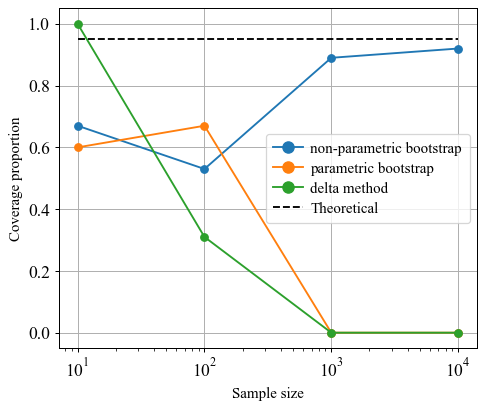

In [30]:
# Compare an empirical coverage of different confidence intervals
# Your code here

n_trials = 100
coverage_boot = np.empty_like(sizes, dtype='float')
coverage_pboot = np.empty_like(sizes, dtype='float')
coverage_delta = np.empty_like(sizes, dtype='float')

for j, size in enumerate(sizes):
    vs = V_distr.rvs((n_trials, size))
    rs = R_distr.rvs((n_trials, size))
    currents = g(vs, rs, t=1)
    means = currents.mean(axis=1)
    l_boot, r_boot = boot_ints[j]
    coverage_boot[j] = np.mean((l_boot < means) & (means < r_boot))
    
    l_pboot, r_pboot = pboot_ints[j]    
    coverage_pboot[j] = np.mean((l_pboot < means) & (means < r_pboot))
    
    l_delta, r_delta = delta_ints[j]
    coverage_delta[j] = np.mean((l_delta < means) & (means < r_delta))

fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=90)
ax.plot(sizes, coverage_boot, '-o', label='non-parametric bootstrap')
ax.plot(sizes, coverage_pboot, '-o', label='parametric bootstrap')
ax.plot(sizes, coverage_delta, '-o', label='delta method')
ax.plot(sizes, [0.95] * len(sizes), 'k--', label='Theoretical')
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.set_xlabel('Sample size', fontsize=12)
ax.set_ylabel('Coverage proportion', fontsize=12)
ax.grid()
plt.show()

In [31]:
# Plot results
# Your code here



Your conclusion:



Non-parametric bootstrap shows better coverage on large samples than parametric, but it requires ML esimation. The main feature of delta method is that it does not require sampling from distributions and it is the best for the case when we need to estimate variance of variable that functionally depenends on observed random variables.